<a href="https://colab.research.google.com/github/nmpacheco/colab/blob/fastai/testing_env.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From fastai ml course

[The Universal Approximation Theorem for Neural Networks](http://neuralnetworksanddeeplearning.com/chap4.html)

[by Michael Nielsen](http://michaelnielsen.org/)

## Prepare env

In [0]:
!pip3 install fastai==0.7.0


In [0]:
!pip3 install https://download.pytorch.org/whl/cu80/torch-0.3.1-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision
# Bug float32 in torch
!pip3 install "torchtext==0.2.3"

In [0]:
!apt-get -qq install -y libsm6 libxext6

In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from os import path, makedirs
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.torch_imports import *
from fastai.io import *
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

#from torch import * 
import torch.nn as nn

from google.colab import drive

In [0]:
drive.mount('/content/drive')

In [0]:
mypath = 'data/mnist/'

In [0]:
makedirs(mypath, exist_ok=True)

In [5]:
print('cu80' if path.exists('/usr/bin/nvidia-smi') else 'cpu')

cu80


In [6]:
torch.cuda.is_available()

True

In [8]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [9]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [10]:
torch.backends.cudnn.enabled

True

## Load and explore data

In [0]:
URL='http://deeplearning.net/data/mnist/'
FILENAME='mnist.pkl.gz'

def load_mnist(filename):
    return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

In [18]:
get_data(URL+FILENAME, mypath+FILENAME)
((x, y), (x_valid, y_valid), _) = load_mnist(mypath+FILENAME)

mnist.pkl.gz: 16.2MB [00:08, 1.87MB/s]                            


In [19]:
type(x), x.shape, type(y), y.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,))

In [20]:
mean = x.mean()
std = x.std()

x=(x-mean)/std
mean, std, x.mean(), x.std()

(0.13044983, 0.3072898, -3.1638146e-07, 0.99999934)

In [21]:
x_valid = (x_valid-mean)/std
x_valid.mean(), x_valid.std()



(-0.005850922, 0.99243325)

In [0]:
def show(img, title=None):
    plt.imshow(img, cmap="gray")
    if title is not None: plt.title(title)

In [0]:
def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap='gray')

In [24]:
x_valid.shape

(10000, 784)

In [25]:
x_imgs = np.reshape(x_valid, (-1,28,28)); x_imgs.shape

(10000, 28, 28)

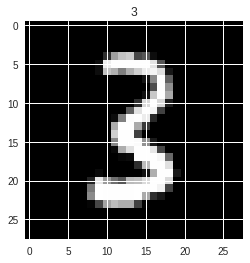

In [26]:
show(x_imgs[0], y_valid[0])

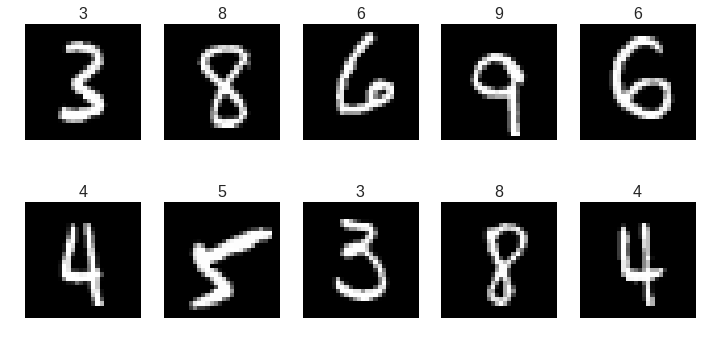

In [27]:
plots(x_imgs[:10], titles=y_valid[:10])

## NN

In [0]:
net = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.LogSoftmax()
).cuda()

In [0]:
md = ImageClassifierData.from_arrays(mypath, (x,y), (x_valid, y_valid))

In [54]:
x.shape

(50000, 784)

In [0]:
loss = nn.NLLLoss()
metrics = [accuracy]
opt = optim.Adam(net.parameters())

In [67]:
fit(net, md, n_epochs=2, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy   
    0      0.150752   0.145367   0.9583    
    1      0.135006   0.145367   0.9583    



[array([0.14537]), 0.9583]

In [0]:
preds = predict(net, md.val_dl)

In [0]:
preds.shape?


In [70]:
preds.argmax(axis=1)[:50]

array([3, 8, 6, 9, 6, 4, 5, 3, 8, 4, 5, 2, 3, 8, 4, 8, 1, 5, 0, 5, 9, 7, 4, 1, 0, 3, 0, 6, 2, 9, 9, 4, 1, 3,
       6, 8, 0, 7, 7, 6, 8, 9, 0, 3, 8, 3, 7, 7, 8, 4])

In [0]:
preds=preds.argmax(axis=1)

In [72]:
np.mean(preds==y_valid)
# same as accuracy in fit... :)

0.9583

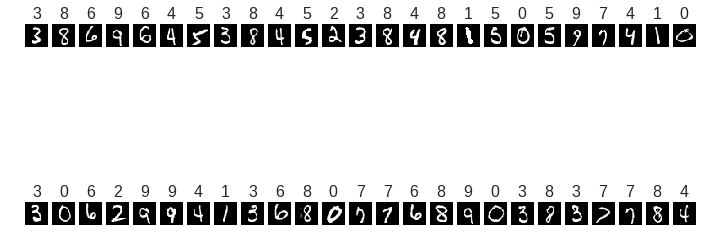

In [73]:
plots(x_imgs[:50], titles=preds[:50])